In [1]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
model = Word2Vec.load("../models/card2vec.model")

In [3]:
cards = list(model.wv.index_to_key)
vectors = [model.wv[card] for card in cards]

In [4]:
len(vectors)

1373

In [5]:
tsne = TSNE(n_components=2, random_state=1, perplexity=30)
vectors_2d = tsne.fit_transform(np.array(vectors))

In [6]:
df = pd.DataFrame(vectors_2d, columns=["x","y"])
df["card"] = cards

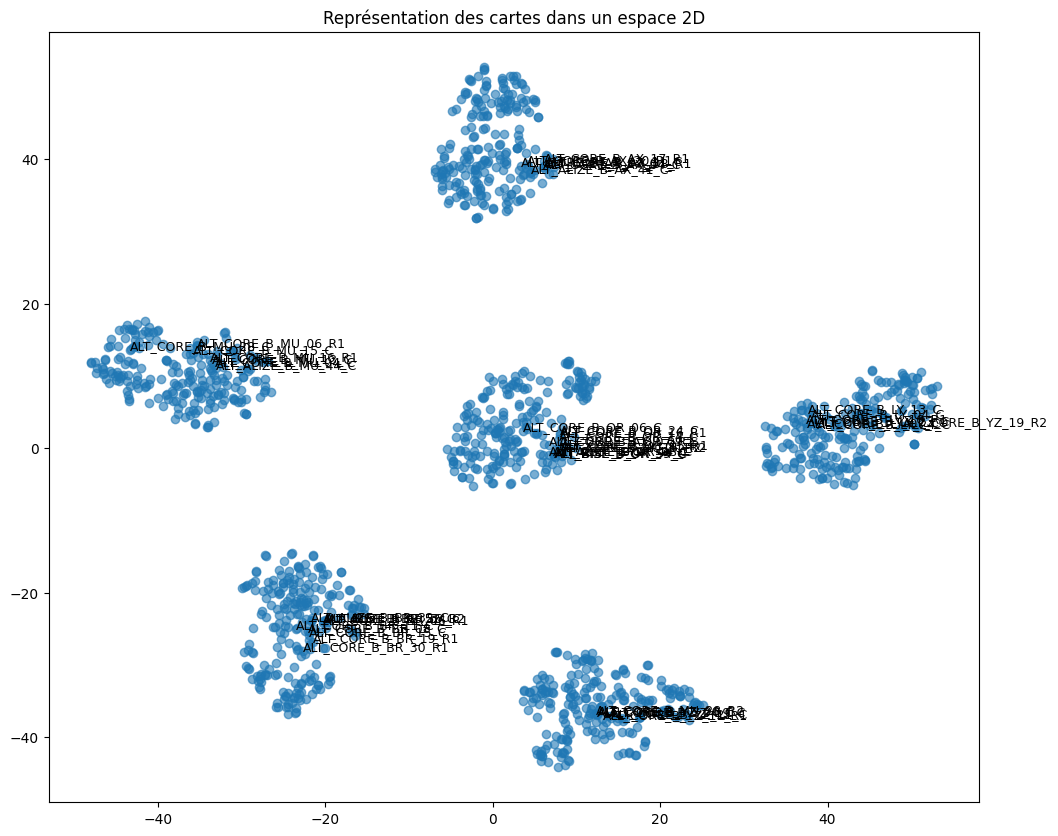

In [7]:
plt.figure(figsize=(12,10))
plt.scatter(df["x"], df["y"], alpha=0.6)
for i, card in enumerate(df["card"][:50]):  # n'afficher que les 50 premières pour la lisibilité
    plt.text(df["x"][i], df["y"][i], card, fontsize=9)
plt.title("Représentation des cartes dans un espace 2D")
plt.show()

In [9]:
fig = px.scatter(df, x="x", y="y", hover_data=["card"])
fig.show()

In [11]:
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
vectors_3d = tsne_3d.fit_transform(np.array(vectors))

In [12]:
df3d = pd.DataFrame(vectors_3d, columns=["x","y","z"])
df3d["card"] = cards

In [13]:
fig3d = px.scatter_3d(df3d, x="x", y="y", z="z", hover_data=["card"])
fig3d.show()